`PAIR PROGRAMMING III`

Hipótesis
Antes de seguir, recordamos las preguntas que nos planteamos al principio del pair programming de EDA para dirigir nuestro análisis.
¿Es Australia es el sitio más peligroso y letal para estar relajada en la playa?
¿Hay diferencias entre los paises en los ataques a hombres y mujeres?
¿Cuáles son las edades que más sufren ataques?
Independientemente de la edad, sufren los hombres más ataques que las mujeres?
¿En qué mes ocurren más ataques?
¿Cuál es la relación entre la especie y el tipo de ataque (si es fatal o no)?
¿Cómo han evolucionado los ataques a lo largo del tiempo?
De todo esto, nos damos cuenta que solo tenemos que limpiar algunas de las columnas, en concreto age, species, country, fatal, year, sex. Reducimos esto a una tabla para saber qué tenemos ya limpito y qué no. Actualizamos esta tabla ya que en el ejercicio de pair de Limpieza I y II ya dejamos algunas columnas limpitas:



Objetivos
En el ejercicio de hoy tendremos que contestar a las siguientes preguntas:
📌 Nota Como siempre, después de cada gráfica incluid una pequeña explicación de lo que nos está mostrando la gráfica.


1. Estableced el tamaño de las figuras al inicio de vuestro jupyter para que todas tengan las mismas dimensiones.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable 

# establecer el tamaño nuestras figuras
plt.rcParams["figure.figsize"] = (10,8)

# en esta lección nos van a salir muchos warning al hacer las gráficas. Para evitar que nos salgan todo el rato podemos ejecutar las siguientes lineas de código
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("../Datos/attacks_limpieza_II.csv")

2. Manos a la obra con los plots, estos irán muy dirigidos hacia las preguntas que queremos contestar, para hacer una primera aproximación a nuestras hipótesis:


   
2.1 ¿Cuántos ataques hubo por pais? ¿Se puede ver algo claro si ploteamos todos los paises? En caso de que no, seleccionad solo los 10 paises con más ataques y volved a hacer el plot.


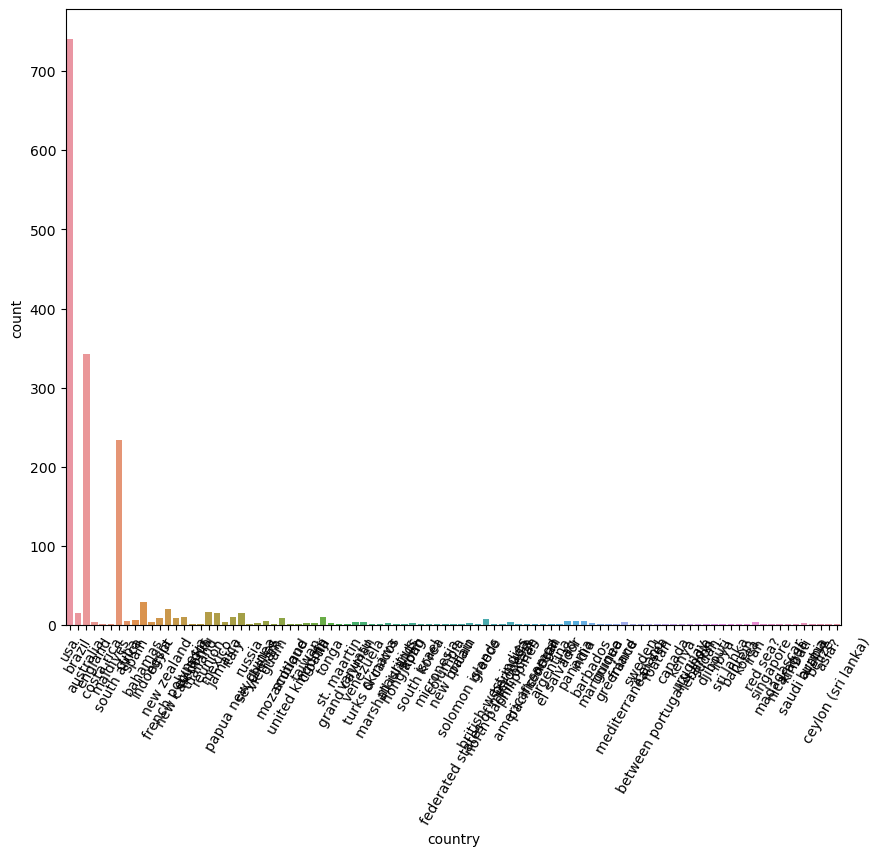

In [2]:
sns.countplot(data=df,x='country') 
plt.xticks(rotation=60);
#no se alcanzan a identificar, por lo que ordenaremos para que solo sean visibles 10 países

Text(0.5, 1.0, 'Gráfica de barras en los 10 países con más ataques')

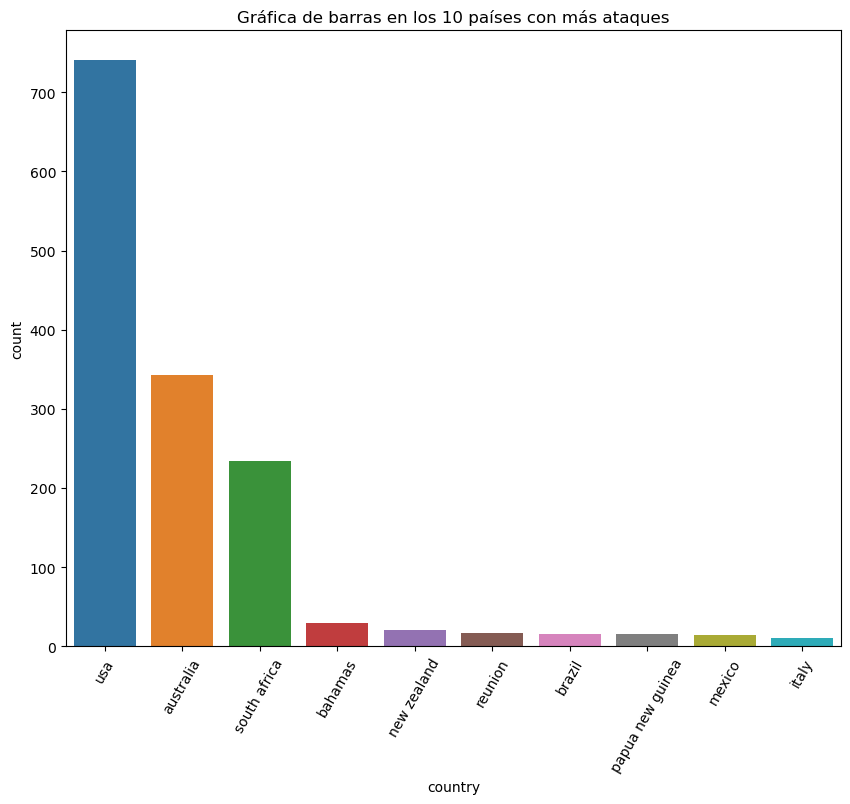

In [16]:
sns.countplot(data=df,x='country', order=df['country'].value_counts().iloc[:10].index)
plt.xticks(rotation=60)
plt.title('Gráfica de barras en los 10 países con más ataques')


In [17]:
paises_10=df['country'].value_counts().iloc[:10]
paises_10

usa                 741
australia           343
south africa        234
bahamas              29
new zealand          21
reunion              17
brazil               16
papua new guinea     16
mexico               15
italy                11
Name: country, dtype: int64

2.2 Usando el DataFrame de los 10 paises con más ataques, ¿hay diferencias entre sexos en esos paises?


In [5]:
df.head(1)

,case_number,year,type,country,area,location,activity,name,time,species,siglo,species_,injury,mes,fatal_bien,genero_bien,categorias_tiburones,edades
0,2018.06.25,2018,Boating,usa,California,"Oceanside, San Diego County",Paddling,Julie Wolfe,18h00,White shark,siglo - XXI,NaN,"No injury to occupant, outrigger canoe and pad...",Jun,N,F,White,57.0


In [6]:
paises_genero_10=pd.DataFrame(df.groupby(['genero_bien', 'country'])['case_number'].count())
paises_genero_10.reset_index(inplace= True)
paises_genero_10.sort_values(by= ('case_number'), ascending= False, inplace= True)
paises_genero_10

,genero_bien,country,case_number
125,M,usa,604
55,M,australia,305
116,M,south africa,222
48,F,usa,137
0,F,australia,38
...,...,...,...
25,F,mauritius,1
57,M,barbados,1
24,F,madagascar,1
94,M,martinique,1


Text(0.5, 0, 'Paises')

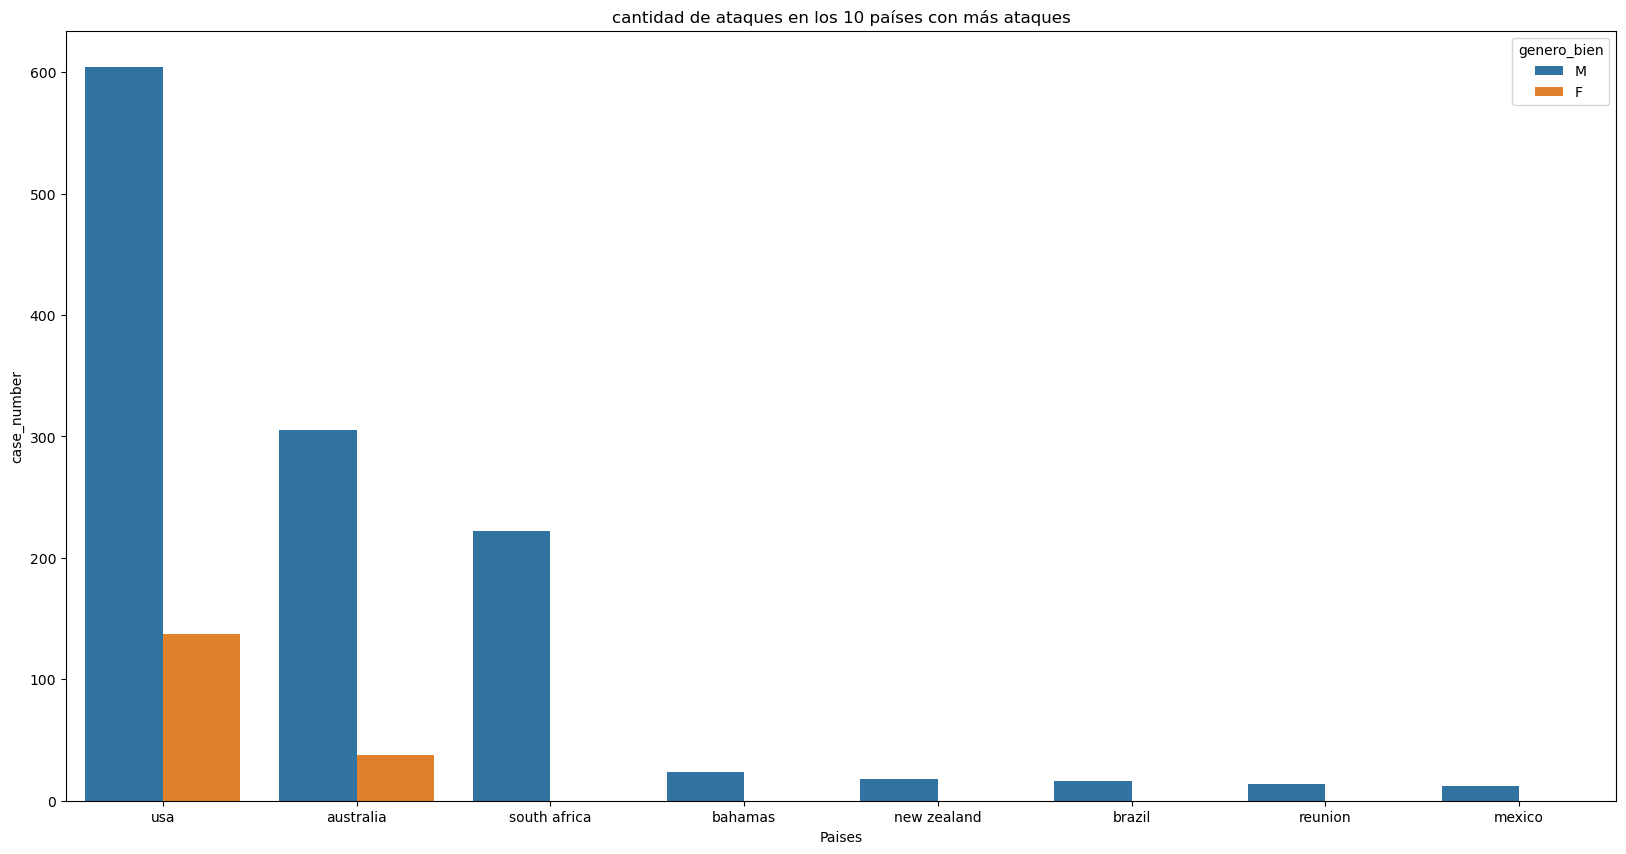

In [7]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=paises_genero_10[:10], x='country', y='case_number', hue= 'genero_bien')
plt.title('cantidad de ataques en los 10 países con más ataques')
ax.set_xlabel('Paises')


2.3 ¿Qué edad recibe mayor número de ataques? 💡 Pista 💡 Para que esta gráfica nos salga legible tendremos que crear antes grupos de edad. Para hacer esto de una forma sencilla tenemos el método pd.cut() que aprendimos en la lección de Limpieza II.


In [18]:
df.edades.unique()

array([57., 18., 15., 32., 21., 30., 60., 33., 19., 25., 10., 69., 55.,
       35., 20., 54., 22., 31., 40., 37., 11., 13., 34., 50., 46., 48.,
       17., 28., 65., 73., 58., 36., 51., 61., 59., 42.,  6., 27., 23.,
       29., 39., 24., 12., 26., 71., 43.,  9., 44., 14., 62., 52., 38.,
       68., 16., 47., 63., 70., 41., 53.,  7., 66., 45., 74., 64.,  8.,
       56., 49., nan, 77., 84.,  5., 67.])

In [9]:
df.edades.min()

5.0

In [10]:
df.edades.max()

84.0

In [11]:
df_copia=df.copy()

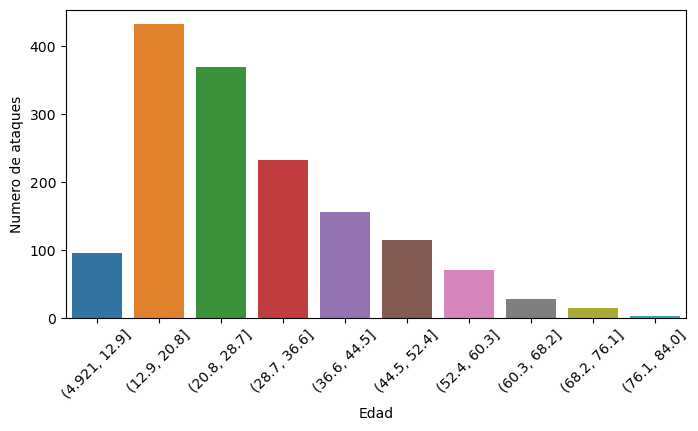

In [12]:
bins = 10
df_copia['edad'] = pd.cut(df_copia['edades'], bins=bins)
plt.figure(figsize =(8,4))
fig = sns.countplot(x= 'edad', data = df_copia)
fig.set(xlabel='Edad', ylabel= 'Numero de ataques')
plt.xticks(rotation=45)
plt.show() 


2.4 Ataques entre sexos, ¿hay diferencia?


In [13]:
genero_ataques= pd.DataFrame(df.groupby('genero_bien')['case_number'].count())
genero_ataques.reset_index(inplace= True)
genero_ataques

,genero_bien,case_number
0,F,279
1,M,1393


Text(0, 0.5, 'numero de casos')

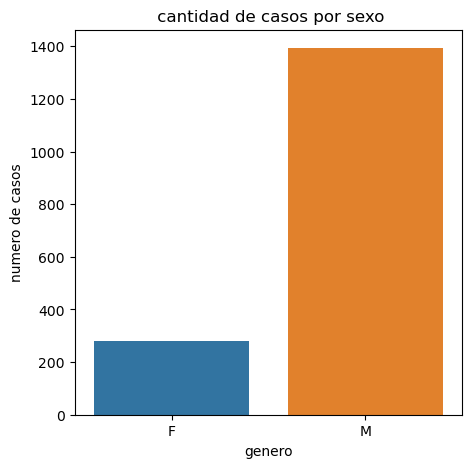

In [19]:
fig,ax=plt.subplots(figsize=(5,5))

sns.barplot(x=genero_ataques['genero_bien'], y=genero_ataques['case_number'], data=genero_ataques)
plt.title(' cantidad de casos por sexo')
ax.set_xlabel('genero')
ax.set_ylabel('numero de casos')

2.5 ¿Cuando ocurren más ataques? ¿Os sale algo raro en la gráfica? Intentad limpiar un poco los datos para que os salga mejor.


Text(24.0, 0.5, 'Numerode ataques')

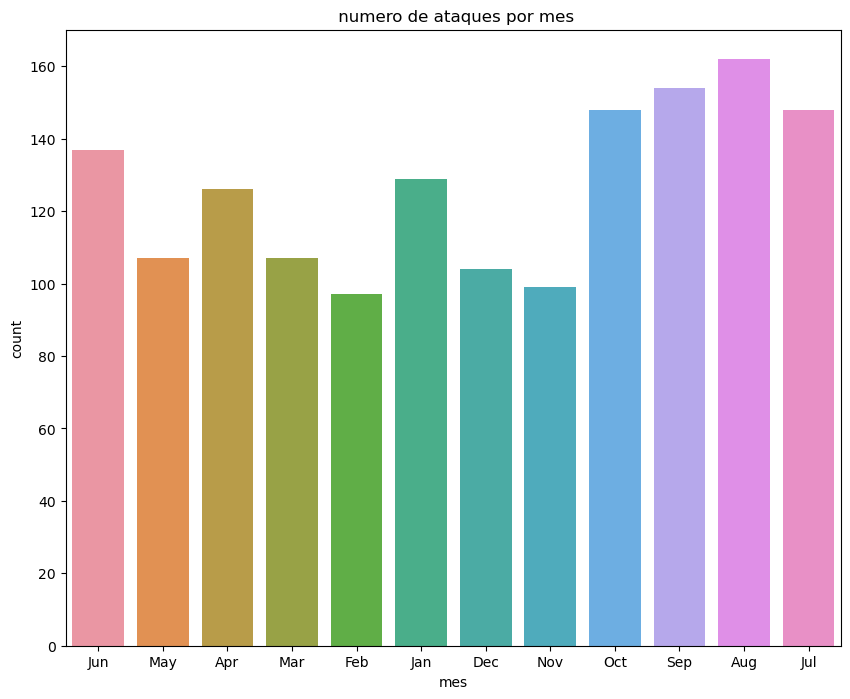

In [15]:
sns.countplot(data=df, x='mes')
plt.title(' numero de ataques por mes')
ax.set_xlabel('Mes')
ax.set_ylabel('Numerode ataques')